In [2]:
#importing stats library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploading the amazon dataset
DF=pd.read_excel('C://Users//Admin//Desktop//Ratings Prediction Project//AMAZON.XLSX')
DF

,Title,Review_Text,Ratings
0,Very bad experience,Anyone looking to buy this product please don'...,2
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...,2
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...,2
4,Never buy wireless from boat,I had brought this product about 10 days back....,2
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


In [4]:
DF.isnull().sum() #there are null values in our dataset

Title            4
Review_Text    702
Ratings          0
dtype: int64

In [5]:
##displaying-rows-with-one-or-more-nan-values-in-pandas-dataframe
df1 = DF[DF.isna().any(axis=1)]
df1

,Title,Review_Text,Ratings
91,Sound,NaN,2
96,One side product budd and ear clip is not there,NaN,2
118,Voice problem and sound problems,NaN,2
150,सर ये ओपन नही हो खराब हो गई बोट रॉकर्ज 255,NaN,2
235,On nahi ho Raha hai,NaN,2
...,...,...,...
26808,Working good,NaN,5
26822,I am very sad to leaving the Alexa ....I love it,NaN,5
26830,Alexa is not connecting with my phone,NaN,5
26832,I just love with this product 😻,NaN,5


In [6]:
#dropping the nan values
DF.dropna(axis=0,inplace=True)

In [7]:
DF[DF.isna().any(axis=1)]

,Title,Review_Text,Ratings


In [8]:
DF.isnull().sum() #now no nan values are there

Title          0
Review_Text    0
Ratings        0
dtype: int64

In [9]:
DF.shape

(26135, 3)

In [10]:
#droping 'Title' to seperate our dependent and independent variable
df=DF.drop('Title',axis=1)
df.head()

,Review_Text,Ratings
0,Anyone looking to buy this product please don'...,2
1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,Everything is good but this product not up to ...,2
3,Product quality - product quality is good in t...,2
4,I had brought this product about 10 days back....,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26135 entries, 0 to 26839
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  26135 non-null  object
 1   Ratings      26135 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 612.5+ KB


In [12]:
df.isnull().sum()

Review_Text    0
Ratings        0
dtype: int64

In [13]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 26135
Columns are 2
Shape is (26135, 2)


<AxesSubplot:xlabel='Ratings', ylabel='count'>

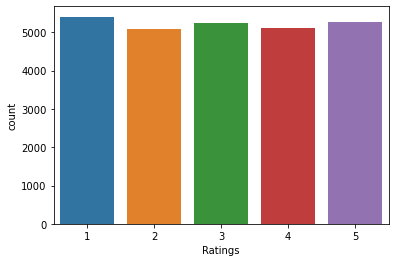

In [14]:
sns.countplot(df.Ratings) #almost ratings are same for each class

In [15]:
x=df.drop('Ratings',axis=1)
x# independent variable

,Review_Text
0,Anyone looking to buy this product please don'...
1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...
2,Everything is good but this product not up to ...
3,Product quality - product quality is good in t...
4,I had brought this product about 10 days back....
...,...
26835,&nbsp;Cool gadget
26836,"Good product by Amazon, very intelligent and ..."
26837,Super
26838,I like it's magnificent sound quality and Alex...


In [16]:
n_features = x.shape[1]
n_features#no of independent variable

1

In [17]:
y=df.Ratings
y# target

0        2
1        2
2        2
3        2
4        2
        ..
26835    5
26836    5
26837    5
26838    5
26839    5
Name: Ratings, Length: 26135, dtype: int64

In [18]:
n_class = len(np.unique(y))
n_class #no. of classes in target

5

In [19]:
#extracting the data's
df.loc[15] #This will give all the data present in 15th row

Review_Text    Quality of the product per hardware wise is OK...
Ratings                                                        2
Name: 15, dtype: object

In [20]:
df.Review_Text.loc[15] #This will give texts column data present in 15th row

'Quality of the product per hardware wise is OK...<br>after using it for 2 weeks I have found that it frequently got disconnected from phone While you are listening to music or watching a video..<br><br>several times it is happening ...want to return the product and get my money back'

In [21]:
df.loc[25]

Review_Text    Not so good, sound quality decrease after 7-10...
Ratings                                                        2
Name: 25, dtype: object

In [22]:
df.Review_Text.loc[25]

'Not so good, sound quality decrease after 7-10 days of use, no bass found, quality is ok, battery backup is good.'

In [24]:
df.reset_index(inplace=True)
df #reseting the index

,index,Review_Text,Ratings
0,0,Anyone looking to buy this product please don'...,2
1,1,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,2,Everything is good but this product not up to ...,2
3,3,Product quality - product quality is good in t...,2
4,4,I had brought this product about 10 days back....,2
...,...,...,...
26130,26835,&nbsp;Cool gadget,5
26131,26836,"Good product by Amazon, very intelligent and ...",5
26132,26837,Super,5
26133,26838,I like it's magnificent sound quality and Alex...,5


In [25]:
df.Ratings[91]

2

In [26]:
df.Review_Text[91]

'Worst product from BOAT. Never Buy this product from amazon because there is no refund or return guarantee on products.'

In [27]:
df.dtypes

index           int64
Review_Text    object
Ratings         int64
dtype: object

In [28]:
df.nunique()

index          26135
Review_Text    16906
Ratings            5
dtype: int64

### Using NLP Technique
### Data cleaning and Text-Preprocessing

In [34]:
#importing NLP libraries
import re       #regular expression
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords           ###stopwords          
from nltk.stem.porter import PorterStemmer  ###stemming
ps=PorterStemmer()

In [36]:
stopwords.words('english') #displaying the stopwords of english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
len(df)

26135

In [38]:
#creating corpus to contain all the sentences or documents
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ',df['Review_Text'][i])  #removing all the special character from the sentences except lower and upper case alphabets
    review.lower() #lowering each sentences
    review.split() #spliting
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=''.join(review) #joining
    corpus.append(review)   #appending the list

In [39]:
#getting the corpus of our texts dataset
corpus

['anne lkng  bu h pruc plee n  bu    the cnnecv  ver pr even fer cnnecng  he evce  cnnuul k  pr whch  ver rrng when u pen he blueh  cnnuu nfcn ge  he phne her hn he phne  whch   cnnece whch bece ver frurng ',
 '                                                                                                                                                                                                                     c c v                                   pruc                                           br                         ac  n cnr bnk               ',
 'everhng  g bu h pruc n up  he rk     cnnecng b eful when n n ue  uenl rng  ke  cll  u wll fn h    lre cnnece  whch  ver ppnng  i wll never b  gn    ee lke we f ne ',
 'pruc qul   pruc qul  g n h prce rnge  al vlble n   clr whch  g hng  br sun qul   un qul  n h uch g  per b erphne pruc  b  lu bu  her  nl b  ler hn vcl  if u ncree vlue       hen u cn len vcl ncel  sng hul hve been     kbp qul  he n hngh  br ber lfe   ber lfe  l

In [40]:
len(corpus)

26135

### 1.Creating the models with the help of Bag of Words (BOW)

In [41]:
### text_preprocessing---- word to vector transformation
### finding our features(x) in vector mode with the help of BOW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,binary=True,ngram_range=(2,2)) #max_feature will give us top 2500 fatures where as ngram_range will give us vocabulary containg two words each
X=cv.fit_transform(corpus).toarray()

In [42]:
###our feature for BOW model
X ###we have converted each words of each sentences into vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
X.shape #there are 26135 rows and 2500 features

(26135, 2500)

In [44]:
X[11] #displaying vector for 11th sentence

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
X[113] #displaying vector for 113th sentence

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
cv.vocabulary_  ##we are getting all the unique vocabulary which is generated from our texts dataset

{'bu pruc': 348,
 'pruc plee': 1748,
 'plee bu': 1616,
 'bu the': 355,
 'cnnecv ver': 506,
 'ver pr': 2211,
 'even fer': 628,
 'cnnecng he': 502,
 'he evce': 947,
 'whch ver': 2363,
 'ver rrng': 2218,
 'he blueh': 907,
 'ge he': 846,
 'he phne': 1009,
 'phne her': 1585,
 'her hn': 1099,
 'hn he': 1135,
 'phne whch': 1603,
 'bece ver': 58,
 'pruc br': 1725,
 'everhng bu': 645,
 'up he': 2129,
 'he rk': 1039,
 'when ue': 2374,
 'ke cll': 1232,
 'wll fn': 2400,
 'ver ppnng': 2210,
 'wll never': 2407,
 'ee lke': 559,
 'we ne': 2257,
 'pruc qul': 1751,
 'qul pruc': 1804,
 'qul prce': 1801,
 'prce rnge': 1680,
 'hng br': 1144,
 'br sun': 247,
 'sun qul': 1971,
 'qul un': 1809,
 'un qul': 2105,
 'qul uch': 1807,
 'bu her': 317,
 'hen cn': 1078,
 'hul hve': 1170,
 'hve been': 1173,
 'qul he': 1792,
 'br ber': 148,
 'ber lfe': 92,
 'fr hr': 761,
 'nl br': 1471,
 'fr he': 754,
 'he ll': 983,
 'bu fr': 309,
 'pruc bu': 1726,
 'wr pruc': 2438,
 'pruc hve': 1740,
 'chrge bu': 429,
 'bu ble': 290,
 

In [47]:
y.value_counts()# we need to balance our classes

1    5408
5    5278
3    5246
4    5104
2    5099
Name: Ratings, dtype: int64

### SMOTE for Balancing the Classes

In [48]:
!pip install -U imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [50]:
y.value_counts() #Classes are balanced now

2    5408
3    5408
4    5408
5    5408
1    5408
Name: Ratings, dtype: int64

In [51]:
print(X.shape)
print(y.shape)

(27040, 2500)
(27040,)


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##### Now we have got our feature and target variable seperately and class of our target variable is now balanced
### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [70]:
#importing machine learning libraries for Classification model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
mb=MultinomialNB()

In [71]:
#finding out the best random_state 
for i in range(0,10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    mb.fit(X_train,y_train)
    pred_test=mb.predict(X_test)
    pred_train=mb.predict(X_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print('\n') 

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.48497596153846156
Testing accuracy of the model is	 0.41752958579881655


At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.48460613905325445
Testing accuracy of the model is	 0.42011834319526625


At random_state-2 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.4933894230769231
Testing accuracy of the model is	 0.4151257396449704


At random_state-3 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.49047707100591714
Testing accuracy of the model is	 0.42732988165680474


At random_state-4 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.4593657544378698
Testing accuracy of the model is	 0.4014423076923077


At random_state-5 The Training and Testing Accuracy of the 

In [72]:
#choosing random_state as 2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
mb.fit(X_train,y_train)
pred_test=mb.predict(X_test)
pred_train=mb.predict(X_train)
print(f'At random_state-{2} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')

At random_state-2 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.4933894230769231
Testing accuracy of the model is	 0.4151257396449704


In [73]:
print('X_train\n',X_train)
print('\nX_test\n',X_test)
print('\ny_train\n',y_train)
print('\ny_test\n',y_test)

X_train
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

y_train
 14648    3
24354    3
6321     2
11075    2
18998    1
        ..
18898    1
11798    2
6637     4
2575     4
23720    2
Name: Ratings, Length: 21632, dtype: int64

y_test
 17196    4
417      2
7441     2
16333    5
2150     3
        ..
23600    4
17830    3
12664    4
6898     5
4563     2
Name: Ratings, Length: 5408, dtype: int64


In [74]:
print('X-train',X_train.shape)
print('\ny_train',y_train.shape)
print('\nX_test',X_test.shape)
print('\ny_test',y_test.shape)

X-train (21632, 2500)

y_train (21632,)

X_test (5408, 2500)

y_test (5408,)


### Finding Out CV Score

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
for i in range(2,4):
    cvs=cross_val_score(mb,X,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.26253698224852073 and standard deviation is 0.0025517751479290085

At K-Fold 3 the CV Score of the logistic model is 0.26937798505561567 and standard deviation is 0.021395742915946488



In [77]:
cvs=cross_val_score(mb,X,y,cv=3)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 3 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 3 the CV Score of the logistic model is 0.26937798505561567 and standard deviation is 0.021395742915946488



##### At each K-Fold I'm getting the same CV score as of testing accuracy which means model is very geniune and behaving well at each stages of training. Now lets try CV score for all other models

In [78]:
#importing other models of classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
sv=SVC()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

### Hyper Parameter Tuning
#### To make the model more accurate by providing their best parameters

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [81]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(X,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

##### Since we have selected out 2500 feature variables so it would take huge time to find out the best hyper parameters if i do it one by one hence will manually define the best parameters for the each models.

In [82]:
#Redefining the models after getting the parameters
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='gini',max_features='log2',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='log_loss',max_features='log2')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'log_loss',max_features= 'sqrt')

In [83]:
#creating a definition to expand the model individually
def model(algorithm,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
    algorithm.fit(X_train,y_train)
    pred_train_X=algorithm.predict(X_train)
    pred_test_y=algorithm.predict(X_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_X))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n\t')
    cvscore=cross_val_score(algorithm,X,y,cv=3)
    cv_accuracy_score=cvscore.mean()
    print(f'At the K-Fold {3} the CV score of model {algorithm} is {cv_accuracy_score}')
    print('\n')


In [84]:
model(mb,X,y)

For model MultinomialNB()
Training_Accuracy_Score= 0.4874722633136095
Testing_Accuracy_Score= 0.41124260355029585

	
At the K-Fold 3 the CV score of model MultinomialNB() is 0.26937798505561567




In [85]:
model(dtc,X,y)

For model DecisionTreeClassifier(max_features='log2')
Training_Accuracy_Score= 0.7595691568047337
Testing_Accuracy_Score= 0.4985207100591716

	
At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.3085801587633532




In [86]:
model(neighbor,X,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.7367326183431953
Testing_Accuracy_Score= 0.479844674556213

	
At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.2971526644537384




In [87]:
model(rfc,X,y)

For model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2')
Training_Accuracy_Score= 0.7595691568047337
Testing_Accuracy_Score= 0.5223742603550295

	
At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.3203399886528324




In [88]:
model(ad,X,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.29553439349112426
Testing_Accuracy_Score= 0.28883136094674555

	
At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.24153066366438805




In [89]:
model(grd,X,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt')
Training_Accuracy_Score= 0.41128883136094674
Testing_Accuracy_Score= 0.3522559171597633

	
At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.27662667126947343




In [90]:
#Displaying all the model's score comparision
Bag_of_Words=pd.DataFrame({'Models':['Multinomial NB','Decision Tree Classifier','K Neighbour Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier'],'Training_Score%':[49,76,74,76,30,41],'Testing_Score%':[41,50,48,52,29,35],'CV_Score%':[27,31,30,32,24,28]})
Bag_of_Words                         

,Models,Training_Score%,Testing_Score%,CV_Score%
0,Multinomial NB,49,41,27
1,Decision Tree Classifier,76,50,31
2,K Neighbour Classifier,74,48,30
3,Random Forest Classifier,76,52,32
4,Ada Boost Classifier,30,29,24
5,Gradient Boosting Classifier,41,35,28


### Conclusion-
As we can see that Random forest classifier is best algorithm among all as it gives highest score as compare to others and also the cv score of this algorithm is greater than others but still overfitting problem is there.

### 2.Creating the models with the help of Term Frequency - Inverse Document Frequency (TF-IDF)

In [91]:
### text_preprocessing---- word to vector transformation
### finding our features(x) with the help of TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2)) #max_feature will give us top 2500 fatures where as ngram_range will give us vocabulary containg one and two words each
X=tv.fit_transform(corpus).toarray()

In [92]:
###our feature for TF-IDF model
X ###we have converted each words of each sentences into vector

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70881495, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [93]:
print(X.shape)
print('\n')
print('X[1]',X[1])
print('\n')
print('X[10]',X[10])
print('\n')
print('vocabulary_',tv.vocabulary_) ##we are getting all the unique vocabulary in the combination of one and two pair features which is generated from our texts dataset

(26135, 2500)


X[1] [0.70881495 0.         0.         ... 0.         0.         0.        ]


X[10] [0. 0. 0. ... 0. 0. 0.]


vocabulary_ {'lkng': 1304, 'bu': 262, 'pruc': 1736, 'plee': 1630, 'the': 2044, 'cnnecv': 472, 'ver': 2226, 'pr': 1667, 'even': 670, 'fer': 738, 'cnnecng': 469, 'he': 946, 'evce': 662, 'cnnuul': 478, 'whch': 2368, 'rrng': 1974, 'when': 2377, 'pen': 1569, 'blueh': 147, 'cnnuu': 477, 'nfcn': 1444, 'ge': 886, 'phne': 1598, 'her': 1084, 'hn': 1117, 'cnnece': 461, 'bece': 74, 'bu pruc': 303, 'plee bu': 1631, 'ver pr': 2250, 'even fer': 671, 'cnnecng he': 470, 'he evce': 982, 'whch ver': 2373, 'he blueh': 953, 'ge he': 890, 'he phne': 1018, 'her hn': 1088, 'hn he': 1121, 'phne whch': 1621, 'br': 157, 'ac': 0, 'pruc br': 1739, 'everhng': 682, 'up': 2172, 'rk': 1951, 'eful': 590, 'ue': 2097, 'uenl': 2126, 'rng': 1957, 'ke': 1229, 'cll': 412, 'wll': 2405, 'fn': 776, 'lre': 1335, 'ppnng': 1665, 'never': 1432, 'gn': 915, 'ee': 575, 'lke': 1294, 'we': 2295, 'ne': 1387, 'eve

In [95]:
y=df.Ratings
y

0        2
1        2
2        2
3        2
4        2
        ..
26130    5
26131    5
26132    5
26133    5
26134    5
Name: Ratings, Length: 26135, dtype: int64

In [96]:
#I'm again balancing the class for the TF-IDF model 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [97]:
y.value_counts()

2    5408
3    5408
4    5408
5    5408
1    5408
Name: Ratings, dtype: int64

In [98]:
print(X.shape)
print(y.shape)

(27040, 2500)
(27040,)


### I've already defined the model definition earlier,so will directly run for each algorithms

In [99]:
model(mb,X,y)

For model MultinomialNB()
Training_Accuracy_Score= 0.5474297337278107
Testing_Accuracy_Score= 0.48039940828402367

	
At the K-Fold 3 the CV score of model MultinomialNB() is 0.31767709032699715




In [100]:
model(dtc,X,y)

For model DecisionTreeClassifier(max_features='log2')
Training_Accuracy_Score= 0.903799926035503
Testing_Accuracy_Score= 0.5563979289940828

	
At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.3182694025943002




In [101]:
model(neighbor,X,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.8948317307692307
Testing_Accuracy_Score= 0.555103550295858

	
At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.3021078289786007




In [102]:
model(rfc,X,y)

For model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2')
Training_Accuracy_Score= 0.903799926035503
Testing_Accuracy_Score= 0.628698224852071

	
At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.3621301744024091




In [103]:
model(ad,X,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.3666789940828402
Testing_Accuracy_Score= 0.3526257396449704

	
At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.260502717220833




In [104]:
model(grd,X,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt')
Training_Accuracy_Score= 0.5213110207100592
Testing_Accuracy_Score= 0.4552514792899408

	
At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.30554672678051104




In [105]:
#Displaying all the model's score comparision
#Displaying all the model's score comparision
TFIDF=pd.DataFrame({'Models':['Multinomial NB','Decision Tree Classifier','K Neighbour Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier'],'Training_Score%':[55,90,89,90,37,52],'Testing_Score%':[48,56,56,63,35,46],'CV_Score%':[32,32,30,36,26,31]})
TFIDF 

,Models,Training_Score%,Testing_Score%,CV_Score%
0,Multinomial NB,55,48,32
1,Decision Tree Classifier,90,56,32
2,K Neighbour Classifier,89,56,30
3,Random Forest Classifier,90,63,36
4,Ada Boost Classifier,37,35,26
5,Gradient Boosting Classifier,52,46,31


### Conclusion-
As you can see that after applying the TF-IDF model our model's accuracy got increased by 10-12% which is really a great achievemnt in predicting the ratings. But still here too the overfitting problem exist.